# LSS Intrinsic Compton-Y

In [1]:
"""
    TITLE   : Calculating the Spectral Distortions
    PROJECT : Cosmic Conchometer
"""

__author__ = "Nathaniel Starkman"

<span style='font-size:30px;font-weight:650'>
    About
</span>




<br><br>

- - - 


## Prepare

### Imports

In [131]:
# BUILT-IN
import configparser
import typing as T

# THIRD PARTY
import matplotlib.pyplot as plt
from astropy import cosmology
from classy import Class
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

# PROJECT-SPECIFIC
import cosmic_conchometer as cc

## Parameters

### CLASS computations

In [3]:
config = configparser.ConfigParser()
config.optionxform = str
config.read("input/parameters.ini")

params = cc.utils.flatten_dict(config._sections.copy())

In [4]:
# Create an instance of the CLASS wrapper
class_cosmo = Class()
# Set the parameters to the cosmological code
class_cosmo.set(params)
# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
class_cosmo.compute()

# thermodynamics
thermo = class_cosmo.get_thermodynamics()

CosmoSevereError: 

Error in Class: Class did not read input parameter(s): background parameters


# Cosmology

TODO make cosmology the same as CLASS cosmology or vice versa

In [ ]:
cosmology.default_cosmology.set("Planck18")
cosmo = cosmology.default_cosmology.get()
cosmo

Basic quantities

<br><br>

- - - 


## Code

<br><br>

- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>

In [45]:
import numpy as np
from astropy.utils.data import get_pkg_data_filename
from mpmath import mp
import matplotlib.pyplot as plt

In [46]:
scriptCgamma = np.load(get_pkg_data_filename("data/scriptC_nogam/scriptCnogam_comp-1_5.npy", package="cosmic_conchometer"), allow_pickle=True)
scriptCgamma.shape

(50, 30, 100)

In [47]:
def scriptC(L, m=None, M=None):
    m = slice(None,None,None) if m is None else m
    M = slice(None,None,None) if M is None else M
    return scriptCgamma[L+1, m, M] - mp.power(L / (L + 1), M) * scriptCgamma[L, m, M]

for L in (0, 8):
    for m in (0, 29):
        for M in (0, 99):
            print(f"C({L}, {m}, {M}) = {scriptC(L, m, M)}, {mp.power(L,m*2/3) * scriptC(L, m, M)}")

C(0, 0, 0) = 1.81163291457464, 1.81163291457464
C(0, 0, 99) = 0.0146695338055372, 0.0146695338055372
C(0, 29, 0) = 3.47812867028077e-41, 0.0
C(0, 29, 99) = 8.08183700918228e-42, 0.0
C(8, 0, 0) = -0.00449882107780075, -0.00449882107780075
C(8, 0, 99) = 0.00381962046224921, 0.00381962046224921
C(8, 29, 0) = 3.6115514896858e-13, 104095.884436341
C(8, 29, 99) = 8.10740501570124e-14, 23368.0039728984


Text(0.5, 0, 'm')

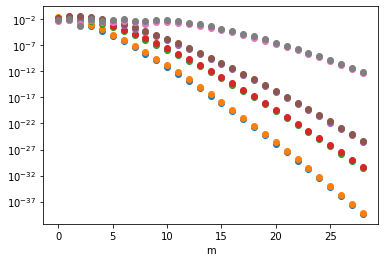

In [51]:
mm = np.arange(0, 29)

plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[0+1, m, 99]), mm)), label="L=0, M=99")
plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[0+1, m, 50]), mm)), label="L=0, M=50")

plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[1+1, m, 99]), mm)), label="L=1, M=99")
plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[1+1, m, 50]), mm)), label="L=1, M=50")

plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[2+1, m, 99]), mm)), label="L=2, M=99")
plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[2+1, m, 50]), mm)), label="L=2, M=50")

plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[8+1, m, 99]), mm)), label="L=8, M=99")
plt.scatter(mm, list(map(lambda m: np.abs(scriptCgamma[8+1, m, 50]), mm)), label="L=8, M=50")
# plt.legend()
plt.yscale("log")
plt.xlabel("m")

Text(0.5, 0, 'm')

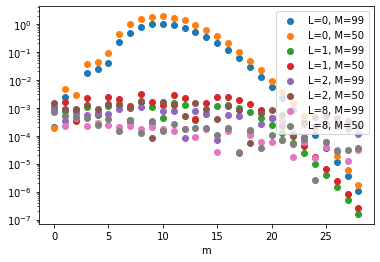

In [11]:
mm = np.arange(0, 29)

plt.scatter(mm, list(map(lambda m: mp.power(8,m) * mp.power(4,.5*m) * np.abs(scriptC(0, m, 99)), mm)), label="L=0, M=99")
plt.scatter(mm, list(map(lambda m: mp.power(8,m) * mp.power(4,.5*m) * np.abs(scriptC(0, m, 50)), mm)), label="L=0, M=50")

plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(1, m, 99)), mm)), label="L=1, M=99")
plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(1, m, 50)), mm)), label="L=1, M=50")

plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(2, m, 99)), mm)), label="L=2, M=99")
plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(2, m, 50)), mm)), label="L=2, M=50")

plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(8, m, 99)), mm)), label="L=8, M=99")
plt.scatter(mm, list(map(lambda m: mp.power(8,m) * np.abs(scriptC(8, m, 50)), mm)), label="L=8, M=50")
plt.legend()
plt.yscale("log")
plt.xlabel("m")